
# 1. Цели проекта и описание данных

## Цели проекта

В этом проекте будут рассмотрены данные транспортной компании занимающейся перевозкой сборных грузов по России.

Эта часть посвящена EDA, основные цели :

  * Знакомство с данными

  * Предобработка - поиск пропусков и дубликатов

  * Оценка данных на аномалии и выбросы и их обработка
---

## Описание данных

В работе  будут использоаны два датасета - *trips* с данными о рейсах компании, *costs* с данными о стоимости рейсов.

Описание полей датасета *trips* :

* *СО* - склад отправитель, первая точка маршрута

* *СП* - склад получатель, последняя точка маршрута

* *ПО* - плечо отправитель

* *ПП* - плечо получатель

* *Код рейса* - идентификатор рейса

* *Маршрут* - маршрут рейса. Может содержать более двух точек

* *Плечо* - текущее плечо рейса

* *Отправление* - дата и время отправки рейса

* *Прибытие* - дата и время фактического прибытия рейса в точку назначения

* *Прибытие план* - рассчетная дата и время прибытия рейса в следующую точку маршрута. Формируется автоматически после отправки.

* *Окончание разгрузки* - дата и время разгрузки рейса

* *Объем кузова* - объем транспортного средства в рейсе

* *Объем в пути* - объем груза в транспортном средстве после отправки

* *Вес в пути* - вес груза в транспортном средстве после отправки

* *Расстояние фрахта* - полное расстояние между всеми точками маршрута рейса

* *Расстояние плеча* - расстояние текущего плеча рейса

* *Перевозчик* - компания перевозчик

Описание полей датасета *costs* :

* *Дата рейса* - дата заведения рейса в базе

* *Код рейса* - **уникальный** идентификатор рейса

* *Маршрут* - маршрут рейса. Может содержать более двух точек

* *Фрахт фактический* - стоимость закупки транспортных услуг у компании перевозчика за рейс

* *Тендер* - номер тендера в который входит рейс. Для не тендерных рейсов - `nan`.

---
# 2. EDA


## 2.1 Загрузка данных и знакомство

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Импортируем данные

# Таблица с рейсами
trips = pd.read_excel('/content/trips.xlsx')

# Таблица со стоимостью
costs = pd.read_excel('/content/costs.xlsx')


Начнем с таблицы с рейсами. Выведем первые 5 строк и информацию о полях.

In [ ]:
trips.head(5)

,Unnamed: 0,СО,СП,ПО,ПП,Код рейса,Маршрут,Плечо,Отправление,Прибытие,Прибытие план,Окончание разгрузки,Объем кузова,Объем в пути,Вес в пути,Расстояние фрахта,Расстояние плеча,Перевозчик
0,0,ОТ,ОМ,ОТ,ОМ,0101ОТОМ,ОТОМ,ОТОМ,2023-01-02 16:58:02,2023-01-04 22:45:15,2023-01-04 16:58:02,2023-01-05 05:14:43,85.71,75.78,13000.70,1521,1521,Омега Инвест Лтд
1,1,ОТ,МБ,ОТ,МБ,0101ОТМБ,ОТМБ,ОТМБ,2023-01-02 21:42:42,2023-01-04 12:21:11,2023-01-04 11:42:42,2023-01-04 23:09:18,84.50,64.15,16813.39,1229,1229,Эко Маркет
2,2,ОТ,УФ,ОТ,УФ,0301ОТУФ-1,ОТУФ,ОТУФ,2023-01-02 21:55:27,2023-01-03 07:03:18,2023-01-03 09:00:00,2023-01-03 12:49:50,84.43,61.46,14604.51,186.5,186.5,Мега Групп
3,3,ОТ,СМ01,ОТ,СМ01,0301ОТСМ-1,ОТСМ,ОТСМ01,2023-01-02 23:08:34,2023-01-03 09:03:38,2023-01-03 09:00:00,2023-01-03 14:25:06,85.71,75.95,15298.17,283.3,283.3,Мега Групп
4,4,ОТ,БН,ОТ,БН,0101ОТБН,ОТБН,ОТБН,2023-01-03 00:04:26,2023-01-16 09:12:05,2023-01-12 15:04:26,2023-01-16 17:59:00,96.53,69.15,12821.79,6605.3,6605.3,Омега Инвест Лтд


In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150369 entries, 0 to 150368
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           150369 non-null  int64         
 1   СО                   150369 non-null  object        
 2   СП                   150369 non-null  object        
 3   ПО                   150369 non-null  object        
 4   ПП                   150369 non-null  object        
 5   Код рейса            150369 non-null  object        
 6   Маршрут              150369 non-null  object        
 7   Плечо                150369 non-null  object        
 8   Отправление          150369 non-null  datetime64[ns]
 9   Прибытие             150369 non-null  object        
 10  Прибытие план        150369 non-null  object        
 11  Окончание разгрузки  150369 non-null  object        
 12  Объем кузова         150369 non-null  float64       
 13  Объем в пути  

- Для удобства следует перевести названия полей к `snake_case` в нижнем регистре

- Поля `Прибытие`, `Прибытие план` и `Окончание разгрузки` нужно преобразовать в `datetime64`

- Поля `Расстояние плеча` и `Расстояние фрахта` преобразовать к числовому типу

- Удалить в датасетах поле *Unnamed: 0 *


In [ ]:
trips.head(1)

,Unnamed: 0,СО,СП,ПО,ПП,Код рейса,Маршрут,Плечо,Отправление,Прибытие,Прибытие план,Окончание разгрузки,Объем кузова,Объем в пути,Вес в пути,Расстояние фрахта,Расстояние плеча,Перевозчик
0,0,ОТ,ОМ,ОТ,ОМ,0101ОТОМ,ОТОМ,ОТОМ,2023-01-02 16:58:02,2023-01-04 22:45:15,2023-01-04 16:58:02,2023-01-05 05:14:43,85.71,75.78,13000.7,1521,1521,Омега Инвест Лтд


In [ ]:
# Приведем названия полей к snake_case в нижнем регистре
trips.columns = trips.columns.str.replace(" ", "_").str.lower()

# Список полей для преведения к datetime
datetime_list = ['прибытие', 'прибытие_план', 'окончание_разгрузки']

# Список полей для приведения к numeric
numeric_list = ['расстояние_фрахта','расстояние_плеча']

# Преобразуем поля с датами
# Задаем формат как в исходных данных, ошибки приводим к Nat
for column in datetime_list:
  trips[column] = pd.to_datetime(trips[column], format='%Y-%m-%d %H:%M%S', errors='coerce')


# Преобразуем поля с расстоянием
for column in numeric_list:
  trips[column] = pd.to_numeric(trips[column], errors='coerce')

# Удаляем лишнее поле
trips = trips.drop('unnamed:_0',axis=1)

trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150369 entries, 0 to 150368
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   со                   150369 non-null  object        
 1   сп                   150369 non-null  object        
 2   по                   150369 non-null  object        
 3   пп                   150369 non-null  object        
 4   код_рейса            150369 non-null  object        
 5   маршрут              150369 non-null  object        
 6   плечо                150369 non-null  object        
 7   отправление          150369 non-null  datetime64[ns]
 8   прибытие             149679 non-null  datetime64[ns]
 9   прибытие_план        150367 non-null  datetime64[ns]
 10  окончание_разгрузки  150368 non-null  datetime64[ns]
 11  объем_кузова         150369 non-null  float64       
 12  объем_в_пути         150369 non-null  float64       
 13  вес_в_пути    

После приведения данных к корректному типу появились пропуски в полях *прибытие, прибытие_план, расстояние_фрахта, расстояние_плеча*. Разберемся с ними позже, пока что рассмотрим датасет `costs`.

In [ ]:
costs.head(5)

,Unnamed: 0,Дата рейса,Код рейса,Маршрут,Фрахт фактический,Тендер,Перевозчик,Менеджер
0,0,05.01.2023,0501БРБРФР,БРБРФР,20,NaN,Гамма Карго Групп,Менеджер 18
1,1,05.01.2023,0501БРФРБР,БРФРБР,20,NaN,Гамма Карго Групп,Менеджер 18
2,2,09.01.2023,0901БРФРБР-2,БРФРБР,20,NaN,Гамма Карго Групп,Менеджер 18
3,3,09.01.2023,0901БРБРФР,БРБРФР,20,NaN,Гамма Карго Групп,Менеджер 18
4,4,09.01.2023,0901ГИМС,ГИМС,20,NaN,Техно Логистик Холдинг,Менеджер 5


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191939 entries, 0 to 191938
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         191939 non-null  int64 
 1   Дата рейса         191939 non-null  object
 2   Код рейса          191939 non-null  object
 3   Маршрут            191939 non-null  object
 4   Фрахт фактический  191939 non-null  int64 
 5   Тендер             74526 non-null   object
 6   Перевозчик         191939 non-null  object
 7   Менеджер           191939 non-null  object
dtypes: int64(2), object(6)
memory usage: 11.7+ MB


- Приведем названия полей к snake_case в нижнем регистре

- Поле *Дата рейса* преобразуем в `datetime64`

In [ ]:
# Удаляем лишнее поле
costs = costs.drop('Unnamed: 0',axis=1)

# приводим названия полей к snake_case в нижнем регистре
costs.columns = costs.columns.str.replace(' ', '_').str.lower()

# приводим поле с датой к формату datetime64
costs['дата_рейса'] = pd.to_datetime(costs['дата_рейса'], format='%d.%m.%Y')

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191939 entries, 0 to 191938
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   дата_рейса         191939 non-null  datetime64[ns]
 1   код_рейса          191939 non-null  object        
 2   маршрут            191939 non-null  object        
 3   фрахт_фактический  191939 non-null  int64         
 4   тендер             74526 non-null   object        
 5   перевозчик         191939 non-null  object        
 6   менеджер           191939 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 10.3+ MB


После предварительных преобразований можно приступать к обработке пропусков.

## 2.2 Обработка пропусков

Создаем простую функцию для вывода `.info()` с подсчетом доли пропусков.

In [ ]:
def cool_info (df):
# Параметры:
# df: датафрейм для анализа

    # Создаём датафрейм аналогичный методу info c сортировкой по доле пропусков
    info = pd.DataFrame({
        'Поле': df.columns,
        'Число не пустых значений': df.count().values,
        'Тип данных': df.dtypes.values,
        'Доля пропусков': (df.isnull().sum().values / len(df)).round(4)
    }).sort_values('Доля пропусков', ascending=False)

    # Считаем типы данных
    dtype_counts = df.dtypes.value_counts()

    # Форматируем вывод
    report = f"""
РАСПРЕДЕЛЕНИЕ ТИПОВ ДАННЫХ:
{dtype_counts.to_string()}

    """

    print(report)
    #display(info.round(2))

    return info

In [ ]:
cool_info(trips)


РАСПРЕДЕЛЕНИЕ ТИПОВ ДАННЫХ:
object            8
float64           5
datetime64[ns]    4

    


,Поле,Число не пустых значений,Тип данных,Доля пропусков
8,прибытие,149679,datetime64[ns],0.0046
14,расстояние_фрахта,150332,float64,0.0002
15,расстояние_плеча,150332,float64,0.0002
0,со,150369,object,0.0000
1,сп,150369,object,0.0000
4,код_рейса,150369,object,0.0000
5,маршрут,150369,object,0.0000
3,пп,150369,object,0.0000
2,по,150369,object,0.0000
7,отправление,150369,datetime64[ns],0.0000


Общая доля пропусков по полю *прибытие* составляет **0.0046%**. Скорее всего отсуствие данных вызвано ошибкой. Удалим их т.к. их доля незначительна.

Пропуски в полях расстояний плеча / фрахта скорее всего вызваны ошибками. Удаление этих строк не должно внести искажений в данные.

Так же можно заметить некорректные значения в поле *окончание_разгрузки*, но их рассмотрим позже при проверки данных на аконмалии и выбросы.


In [ ]:
# Удаляем пропуски в целевых полях
trips = trips.dropna(subset=['прибытие', 'расстояние_плеча','расстояние_фрахта'])

cool_info(trips)


РАСПРЕДЕЛЕНИЕ ТИПОВ ДАННЫХ:
object            8
float64           5
datetime64[ns]    4

    


,Поле,Число не пустых значений,Тип данных,Доля пропусков
0,со,149642,object,0.0
1,сп,149642,object,0.0
2,по,149642,object,0.0
3,пп,149642,object,0.0
4,код_рейса,149642,object,0.0
5,маршрут,149642,object,0.0
6,плечо,149642,object,0.0
7,отправление,149642,datetime64[ns],0.0
8,прибытие,149642,datetime64[ns],0.0
9,прибытие_план,149640,datetime64[ns],0.0


Теперь оценим пропуски в датасете `costs` :

In [ ]:
cool_info(costs)


РАСПРЕДЕЛЕНИЕ ТИПОВ ДАННЫХ:
object            5
datetime64[ns]    1
int64             1

    


,Поле,Число не пустых значений,Тип данных,Доля пропусков
4,тендер,74526,object,0.6117
1,код_рейса,191939,object,0.0000
0,дата_рейса,191939,datetime64[ns],0.0000
2,маршрут,191939,object,0.0000
3,фрахт_фактический,191939,int64,0.0000
5,перевозчик,191939,object,0.0000
6,менеджер,191939,object,0.0000


Пропуски в поле *тендер* говорят о том что рейс не был выполнен в результате тендерного соглашения. Заменим пропуски на индикатор. В качестве интикатора используем *0* как строку.

Проверим, есть ли такие записи в датасете.

In [ ]:
# Проверяем есть ли строки с индикатором
marker_test_count = costs[costs['тендер']=='0'].shape[0]

print(f"Число строк с искомым значением : {marker_test_count}")

Число строк с искомым значением : 0


In [ ]:
# заменяем пропуски на индикатор
costs['тендер'] = costs['тендер'].fillna('0')
# Проверяем поле на пропуски
print(f"Число пропусков в поле тендер : {costs['тендер'].isna().sum()}")

Число пропусков в поле тендер : 0


## 2.3 Проверка на дубликаты

Проверим оба датасета на дубликаты.

  * Для датасета trips используем проверку на явные дубликаты и по сочетаниям полей в которых дубликатов быть не должно. В нашем случае это сочетания :
      - *код_рейса*, *отправление* - т.к. рейс не может быть одновременно отправлен из двух точек
      - *код_рейса*, *прибытие* т.к. рейс не может одновременно прибыть в одну точку
      - *код_рейса*, *объем_в_пути* т.к. объем в рейсе должен измениться

  * Для датасета costs используем проверку на явные дубликаты, а так же по полю *код_рейса* т.к. значение в этом поле должно быть уникальным

In [ ]:
# Считаем кол-во явных дубликатов в датасетах

# Выводим
print(f'Число явных дубликатов trips : {trips.duplicated().sum()}')
print(f'Число дубликатов trips по полям код_рейса, отправление: {trips.duplicated(subset=['код_рейса','отправление']).sum()}')
print(f'Число дубликатов trips по полям код_рейса, прибытие: {trips.duplicated(subset=['код_рейса','прибытие']).sum()}')
print(f'Число дубликатов trips по полям код_рейса, объем_в_пути: {trips.duplicated(subset=['код_рейса','объем_в_пути']).sum()}')

print(f'\nЧисло явных дубликатов costs : {costs.duplicated().sum()}')
print(f'Числодубликатов costs по полю код_рейса: {costs.duplicated(subset='код_рейса').sum()}')

Число явных дубликатов trips : 0
Число дубликатов trips по полям код_рейса, отправление: 5
Число дубликатов trips по полям код_рейса, прибытие: 0
Число дубликатов trips по полям код_рейса, объем_в_пути: 0

Число явных дубликатов costs : 0
Числодубликатов costs по полю код_рейса: 0


Найдено 5 дубликатов в таблице *trips* по полям *код_рейса, отправление*. Вывкедем их.

In [ ]:
# Выводим проблемные строки, сортируем по времени прибытия
trips_duplicates = trips[trips.duplicated(subset=['код_рейса','отправление'],keep=False)==True].sort_values('прибытие')

display(trips_duplicates)

,со,сп,по,пп,код_рейса,маршрут,плечо,отправление,прибытие,прибытие_план,окончание_разгрузки,объем_кузова,объем_в_пути,вес_в_пути,расстояние_фрахта,расстояние_плеча,перевозчик
12988,МС,МВ,МС,УФ,2701МСМВУФ,МСМВУФ,МСМВ,2023-01-28 22:00:00,2023-01-28 11:54:03,2023-01-29 23:00:00,2023-01-31 15:41:03,91.20,59.51,9090.16,1381.9,34.1,Эко Маркет
12987,МВ,УФ,МВ,УФ,2701МСМВУФ,МСМВУФ,МВУФ,2023-01-28 22:00:00,2023-01-30 23:27:30,2023-01-31 00:00:00,2023-01-31 15:41:03,91.20,69.43,10541.06,1381.9,1347.8,Эко Маркет
48464,МС,МВ,МС,УФ,2803МСМВУФ,МСМВУФ,МСМВ,2023-03-29 22:00:00,2023-03-29 15:25:34,2023-03-30 23:00:00,2023-03-31 23:20:15,83.72,44.41,9601.54,1381.9,34.1,Профи Сервис Инк
48462,МВ,УФ,МВ,УФ,2803МСМВУФ,МСМВУФ,МВУФ,2023-03-29 22:00:00,2023-03-31 18:31:06,2023-03-31 18:00:00,2023-03-31 23:20:15,83.72,64.81,12461.68,1381.9,1347.8,Профи Сервис Инк
50534,МС,МВ,МС,ИЖ,3103МСМВИЖ,МСМВИЖ,МСМВ,2023-04-01 22:00:00,2023-04-01 08:43:46,2023-04-02 23:00:00,2023-04-03 00:46:03,86.81,54.14,10451.50,1222.0,34.1,Эко Маркет
50531,МВ,ИЖ,МВ,ИЖ,3103МСМВИЖ,МСМВИЖ,МВИЖ,2023-04-01 22:00:00,2023-04-02 20:08:45,2023-04-03 09:00:00,2023-04-03 00:50:14,86.81,75.06,13289.19,1222.0,1187.9,Эко Маркет
105317,МС,МВ,МС,АР,2706МСМВАРСД,МСМВАРСД,МСМВ,2023-06-28 22:00:00,2023-06-28 16:00:51,2023-06-29 23:00:00,2023-06-30 14:10:56,81.12,66.69,10277.39,1322.0,34.1,Эко Деливери Корп
105314,МВ,АР,МВ,АР,2706МСМВАРСД,МСМВАРСД,МВАР,2023-06-28 22:00:00,2023-06-30 09:29:30,2023-06-30 09:00:00,2023-06-30 14:21:27,81.12,75.78,11870.69,1322.0,1241.5,Эко Деливери Корп
133474,МВ,МС,МВ,ПР01,1008МВМСПР-1,МВМСПР,МВМС,2023-08-11 22:00:00,2023-08-11 07:25:06,2023-08-12 00:00:00,2023-08-14 10:13:09,76.07,27.80,5534.95,1473.4,41.2,Корпорация Маркет Групп
133476,МС,ПР01,МВ,ПР01,1008МВМСПР-1,МВМСПР,МСПР01,2023-08-11 22:00:00,2023-08-13 20:42:33,2023-08-13 15:00:00,2023-08-14 10:13:09,76.07,68.30,11887.47,1473.4,1432.2,Корпорация Маркет Групп


В этих рейсах возникла ошибка заполнения поля отправление - данные по первому плечу записаны некорректно.

При этом, расстоянике плеча небольшое - от 34 до 41 км, что занимает в среднем около часа в пути. Скорректируем данные, отняв от значения поля *прибытие* 1 час.

In [ ]:
# Создаем список рейсов для корректировки
trips_list = trips_duplicates['код_рейса'].unique()

for trip_code in trips_list:
    # Создаем маску для текущего рейса
    mask = trips['код_рейса'] == trip_code

    # Проверяем условие только для этого рейса
    problem_mask = mask & (trips['отправление'] > trips['прибытие'])

    if problem_mask.any():
        # Исправляем только проблемные строки этого рейса
        trips.loc[problem_mask, 'отправление'] = (
            trips.loc[problem_mask, 'прибытие'] - pd.Timedelta(hours=1)  # ← исправлено: hours вместо hour
        )

print(f'Число дубликатов trips по полям код_рейса, отправление: {trips.duplicated(subset=['код_рейса','отправление']).sum()}')
print('\n')

display(trips[trips['код_рейса'].isin(trips_list)])




Число дубликатов trips по полям код_рейса, отправление: 0




,со,сп,по,пп,код_рейса,маршрут,плечо,отправление,прибытие,прибытие_план,окончание_разгрузки,объем_кузова,объем_в_пути,вес_в_пути,расстояние_фрахта,расстояние_плеча,перевозчик
12987,МВ,УФ,МВ,УФ,2701МСМВУФ,МСМВУФ,МВУФ,2023-01-28 22:00:00,2023-01-30 23:27:30,2023-01-31 00:00:00,2023-01-31 15:41:03,91.20,69.43,10541.06,1381.9,1347.8,Эко Маркет
12988,МС,МВ,МС,УФ,2701МСМВУФ,МСМВУФ,МСМВ,2023-01-28 10:54:03,2023-01-28 11:54:03,2023-01-29 23:00:00,2023-01-31 15:41:03,91.20,59.51,9090.16,1381.9,34.1,Эко Маркет
48462,МВ,УФ,МВ,УФ,2803МСМВУФ,МСМВУФ,МВУФ,2023-03-29 22:00:00,2023-03-31 18:31:06,2023-03-31 18:00:00,2023-03-31 23:20:15,83.72,64.81,12461.68,1381.9,1347.8,Профи Сервис Инк
48464,МС,МВ,МС,УФ,2803МСМВУФ,МСМВУФ,МСМВ,2023-03-29 14:25:34,2023-03-29 15:25:34,2023-03-30 23:00:00,2023-03-31 23:20:15,83.72,44.41,9601.54,1381.9,34.1,Профи Сервис Инк
50531,МВ,ИЖ,МВ,ИЖ,3103МСМВИЖ,МСМВИЖ,МВИЖ,2023-04-01 22:00:00,2023-04-02 20:08:45,2023-04-03 09:00:00,2023-04-03 00:50:14,86.81,75.06,13289.19,1222.0,1187.9,Эко Маркет
50534,МС,МВ,МС,ИЖ,3103МСМВИЖ,МСМВИЖ,МСМВ,2023-04-01 07:43:46,2023-04-01 08:43:46,2023-04-02 23:00:00,2023-04-03 00:46:03,86.81,54.14,10451.50,1222.0,34.1,Эко Маркет
105314,МВ,АР,МВ,АР,2706МСМВАРСД,МСМВАРСД,МВАР,2023-06-28 22:00:00,2023-06-30 09:29:30,2023-06-30 09:00:00,2023-06-30 14:21:27,81.12,75.78,11870.69,1322.0,1241.5,Эко Деливери Корп
105317,МС,МВ,МС,АР,2706МСМВАРСД,МСМВАРСД,МСМВ,2023-06-28 15:00:51,2023-06-28 16:00:51,2023-06-29 23:00:00,2023-06-30 14:10:56,81.12,66.69,10277.39,1322.0,34.1,Эко Деливери Корп
133474,МВ,МС,МВ,ПР01,1008МВМСПР-1,МВМСПР,МВМС,2023-08-11 06:25:06,2023-08-11 07:25:06,2023-08-12 00:00:00,2023-08-14 10:13:09,76.07,27.80,5534.95,1473.4,41.2,Корпорация Маркет Групп
133476,МС,ПР01,МВ,ПР01,1008МВМСПР-1,МВМСПР,МСПР01,2023-08-11 22:00:00,2023-08-13 20:42:33,2023-08-13 15:00:00,2023-08-14 10:13:09,76.07,68.30,11887.47,1473.4,1432.2,Корпорация Маркет Групп


## 2.4 Обработка аномалий и выборосов

---
### Оценка полей с датой и временем

Выше были отмечены аномалии в поле *окончание_разгрузки* датасета `trips`. Рассмотрим все поля датасета которые хранят данные типа `datetime64`.

In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149642 entries, 0 to 150311
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   со                   149642 non-null  object        
 1   сп                   149642 non-null  object        
 2   по                   149642 non-null  object        
 3   пп                   149642 non-null  object        
 4   код_рейса            149642 non-null  object        
 5   маршрут              149642 non-null  object        
 6   плечо                149642 non-null  object        
 7   отправление          149642 non-null  datetime64[ns]
 8   прибытие             149642 non-null  datetime64[ns]
 9   прибытие_план        149640 non-null  datetime64[ns]
 10  окончание_разгрузки  149641 non-null  datetime64[ns]
 11  объем_кузова         149642 non-null  float64       
 12  объем_в_пути         149642 non-null  float64       
 13  вес_в_пути         

In [ ]:
# Создаем список полей с типом данных datetime64[ns]
trips_dt_list = ['отправление','прибытие','прибытие_план','окончание_разгрузки']


# С помощью цикла выводим метод describe() для целевых полей
for column in trips_dt_list:
  display(trips[column].describe())
  print()

,отправление
count,149642
mean,2023-05-10 09:34:57.098982912
min,2023-01-02 16:58:02
25%,2023-03-11 23:54:42.750000128
50%,2023-05-11 23:42:57.500000
75%,2023-07-10 03:22:46.249999872
max,2023-09-07 22:06:51


,прибытие
count,149642
mean,2023-05-11 07:55:16.282647552
min,2023-01-03 07:03:18
25%,2023-03-13 10:29:07.750000128
50%,2023-05-12 18:28:28
75%,2023-07-11 00:04:09
max,2026-05-26 21:00:00


,прибытие_план
count,149640
mean,2023-05-11 11:28:19.032611840
min,2023-01-03 09:00:00
25%,2023-03-13 09:00:00
50%,2023-05-12 15:59:23
75%,2023-07-10 22:24:01.500000
max,2114-05-29 00:00:00


,окончание_разгрузки
count,149641
mean,2023-02-23 15:06:22.630315520
min,1900-01-01 00:00:00
25%,2023-03-13 13:12:47
50%,2023-05-12 16:33:15
75%,2023-07-11 00:47:11
max,2023-09-08 10:58:51




*   В поле *отпраавление* аномалий не обнаружено

*   В поле *прибытие* максимальная дата **2026-05-26 21:00:00** - скорее всего это ошибка

* В поле прибытие план максимальная дата **2114-05-29 00:00:00** - ошибка

* Минимальная дата в поле *окончание разгрузки* **1900-01-01 00:00:00**

Разберем каждый пункт.



In [ ]:
# Создаем переменную для подсчета общего кол-ва аномальных строк
i = 0
year_check = 2023
# С помощью цикла подсчитаем число аномальных строк в  каждом поле
for column in trips_dt_list:
  # суммируем общее число аномальных строк
  i = i + trips[trips[column].dt.year!=year_check].shape[0]
  # Для кадого поля выводим проблемные строки и их число
  print(f"Число аномальных строк поля {column} : {trips[trips[column].dt.year!=year_check].shape[0]}")
  print()
  display(trips[trips[column].dt.year!=year_check])
  print()

print(f"Всего аномальных строк : {i}, или {round((i / trips.shape[0])*100,2)}% от всех данных")

Число аномальных строк поля отправление : 0



,со,сп,по,пп,код_рейса,маршрут,плечо,отправление,прибытие,прибытие_план,окончание_разгрузки,объем_кузова,объем_в_пути,вес_в_пути,расстояние_фрахта,расстояние_плеча,перевозчик



Число аномальных строк поля прибытие : 1



,со,сп,по,пп,код_рейса,маршрут,плечо,отправление,прибытие,прибытие_план,окончание_разгрузки,объем_кузова,объем_в_пути,вес_в_пути,расстояние_фрахта,расстояние_плеча,перевозчик
82350,МБ,ЕК01,МБ,ЕК01,2305МБЕК-8,МБЕК,МБЕК01,2023-05-23 22:32:24,2026-05-26 21:00:00,2023-05-26 06:32:24,2023-05-27 14:53:24,83.72,86.19,10371.72,1776.4,1776.4,Дельта Маркет



Число аномальных строк поля прибытие_план : 3



,со,сп,по,пп,код_рейса,маршрут,плечо,отправление,прибытие,прибытие_план,окончание_разгрузки,объем_кузова,объем_в_пути,вес_в_пути,расстояние_фрахта,расстояние_плеча,перевозчик
68836,НБ01,МБ,НБ01,МБ,2904НБМБ,НБМБ,НБ01МБ,2023-04-30 19:39:31,2023-05-02 01:30:13,NaT,2023-05-02 05:19:34,103.88,88.46,14626.02,3371.3,3371.3,Гамма Холдинг Лтд
86122,МВФР02,МБ,МВФР02,МБ,2905МВФР02МБ,МВФР02МБ,МВФР02МБ,2023-05-29 19:32:14,2023-05-29 22:10:37,2114-05-29,2023-05-29 22:12:08,40.48,6.43,1040.65,100.8,100.8,Иннова Шипмент Инк
102099,ТШ,МВсвхКРОК,ТШ,МВсвхКРОК,2206ТШМВсвхКРОК,ТШМВсвхКРОК,ТШМВсвхКРОК,2023-06-23 14:44:43,2023-06-30 06:00:00,NaT,2023-07-11 12:12:18,84.34,89.00,20071.20,3408.9,3408.9,Техно Реф Холдинг



Число аномальных строк поля окончание_разгрузки : 264



,со,сп,по,пп,код_рейса,маршрут,плечо,отправление,прибытие,прибытие_план,окончание_разгрузки,объем_кузова,объем_в_пути,вес_в_пути,расстояние_фрахта,расстояние_плеча,перевозчик
118,МЮ,МБ,МЮ,МБ,0301МЮМБ-1,МЮМБ,МЮМБ,2023-01-03 22:07:29,2023-01-04 05:22:30,2023-01-03 23:07:29,1900-01-01,85.71,66.45,10169.32,7.6,7.6,Мега Групп
4078,ЛЮ,МБ,ЛЮ,МБ,1301ЛЮМБ,ЛЮМБ,ЛЮМБ,2023-01-13 18:27:26,2023-01-13 20:48:43,2023-01-13 19:27:26,1900-01-01,85.71,74.88,13525.97,32.1,32.1,Мега Групп
6243,МР,СП,МР,МБ,1701МРСПМБ-1,МРСПМБ,МРСП,2023-01-18 01:58:56,2023-01-19 14:00:19,2023-01-19 20:58:56,1900-01-01,85.71,73.95,13885.89,2089.8,1342.6,Мега Групп
6405,ВР,УР,ВР,УР,1701ВРУР-1,ВРУР,ВРУР,2023-01-18 07:31:18,2023-01-18 12:42:37,2023-01-18 13:31:18,1900-01-01,36.16,6.00,1019.32,298.5,298.5,Мега Групп
6767,ИД,МБ,ИД,МБ,1801ИДМБ-1,ИДМБ,ИДМБ,2023-01-18 19:19:19,2023-01-19 00:58:29,2023-01-18 21:19:19,1900-01-01,85.71,59.63,11121.18,27.4,27.4,Стар Инвест Инк
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150219,МВ,МС,МВ,МС,0709МВМС-2,МВМС,МВМС,2023-09-07 19:42:44,2023-09-07 21:44:17,2023-09-07 21:42:44,1900-01-01,79.56,74.97,12681.38,41.2,41.2,Стар Инвест Инк
150223,АБ,КК,АБ,КК,0609АБКК-2,АБКК,АБКК,2023-09-07 19:51:21,2023-09-08 03:38:53,2023-09-08 04:51:21,1900-01-01,85.71,23.72,6011.15,418.1,418.1,Мега Групп
150237,БЛ,НБ01,БЛ,НБ01,0709БЛНБ,БЛНБ,БЛНБ01,2023-09-07 20:15:01,2023-09-08 01:30:25,2023-09-08 01:15:01,1900-01-01,85.71,46.70,13649.68,239.2,239.2,Мега Групп
150246,МВ,МБ,МВ,МБ,0709МВМБ,МВМБ,МВМБ,2023-09-07 20:38:05,2023-09-07 22:20:40,2023-09-07 21:38:05,1900-01-01,87.75,73.51,15957.53,36.1,36.1,Мега Групп



Всего аномальных строк : 268, или 0.18% от всех данных


Всего 266 проблемных строк, большая часть из них в поле с окончанием разгрузки. Т.к. данные в этих полях понадобятся для дальнеших расчетов и анализа удалим аномалии. Их сумма меньше 1% от всех данных и удаление не приведет к существенному искажению.

In [ ]:
# С помощью цикла подсчитаем число аномальных строк в  каждом поле
for column in trips_dt_list:
  trips = trips[trips[column].dt.year==year_check]

i = 0

# С помощью цикла подсчитаем число аномальных строк в  каждом поле
for column in trips_dt_list:
  # суммируем общее число аномальных строк
  i = i + trips[trips[column].dt.year!=year_check].shape[0]
  # Для кадого поля выводим проблемные строки и их число
  print(f"Число аномальных строк поля {column} : {trips[trips[column].dt.year!=year_check].shape[0]}")
  print()

print(f"Всего аномальных строк : {i}, или {round((i / trips.shape[0])*100,2)}% от всех данных")

Число аномальных строк поля отправление : 0

Число аномальных строк поля прибытие : 0

Число аномальных строк поля прибытие_план : 0

Число аномальных строк поля окончание_разгрузки : 0

Всего аномальных строк : 0, или 0.0% от всех данных


Теперь проверим, есть ли рейсы где дата отправления больше чем дата прибытия.

In [ ]:
print(f"Число строк где дата отправления больше чем дата прибытия :{trips[trips['отправление'] > trips['прибытие']].shape[0]}")

Число строк где дата отправления больше чем дата прибытия :683


Эти ошибки помешают вычислить корректное время опоздания для рейсов. Удалим эти строки т.к. нет надежного способа восстановить данные.

In [ ]:
# Фильтруем данные
trips = trips[~(trips['отправление'] >= trips['прибытие'])]
# Проверяем результат
print(f"Число строк где дата отправления больше чем дата прибытия :{trips[trips['отправление'] > trips['прибытие']].shape[0]}")

Число строк где дата отправления больше чем дата прибытия :0


---
### Оценка числовых полей

Приступим к оценке полей с числовыми данными датасета trips.

In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148689 entries, 0 to 150311
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   со                   148689 non-null  object        
 1   сп                   148689 non-null  object        
 2   по                   148689 non-null  object        
 3   пп                   148689 non-null  object        
 4   код_рейса            148689 non-null  object        
 5   маршрут              148689 non-null  object        
 6   плечо                148689 non-null  object        
 7   отправление          148689 non-null  datetime64[ns]
 8   прибытие             148689 non-null  datetime64[ns]
 9   прибытие_план        148689 non-null  datetime64[ns]
 10  окончание_разгрузки  148689 non-null  datetime64[ns]
 11  объем_кузова         148689 non-null  float64       
 12  объем_в_пути         148689 non-null  float64       
 13  вес_в_пути         

Описательные статистики поля объем_кузова


,объем_кузова
count,148689.00
mean,74.10
std,21.92
min,0.00
25%,55.02
50%,84.34
75%,85.71
max,137.59


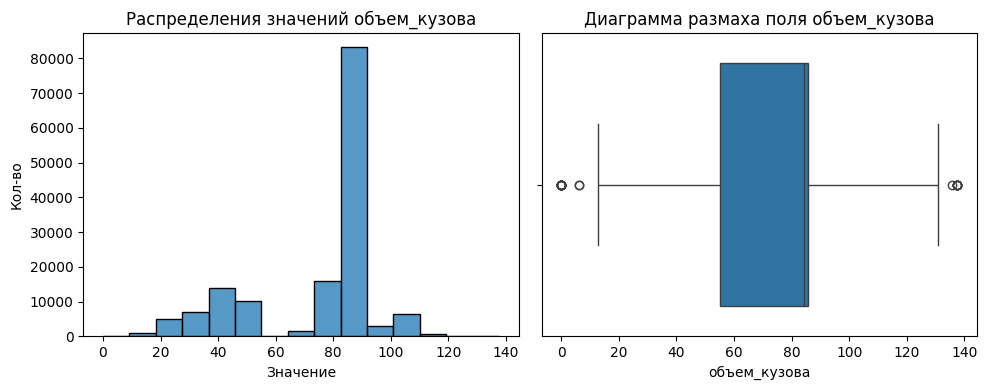



Описательные статистики поля объем_в_пути


,объем_в_пути
count,148689.00
mean,44.70
std,26.29
min,0.01
25%,20.58
50%,46.54
75%,67.27
max,235.98


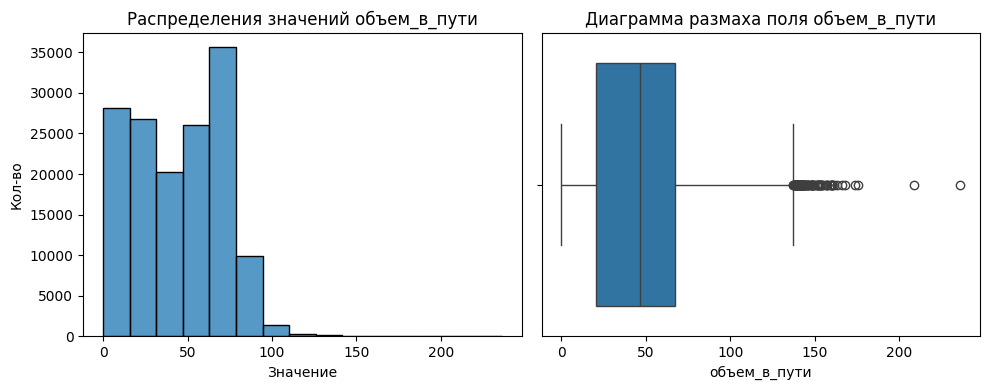



Описательные статистики поля вес_в_пути


,вес_в_пути
count,148689.00
mean,8708.89
std,7166.40
min,0.01
25%,4106.55
50%,8858.08
75%,12635.40
max,1308995.00


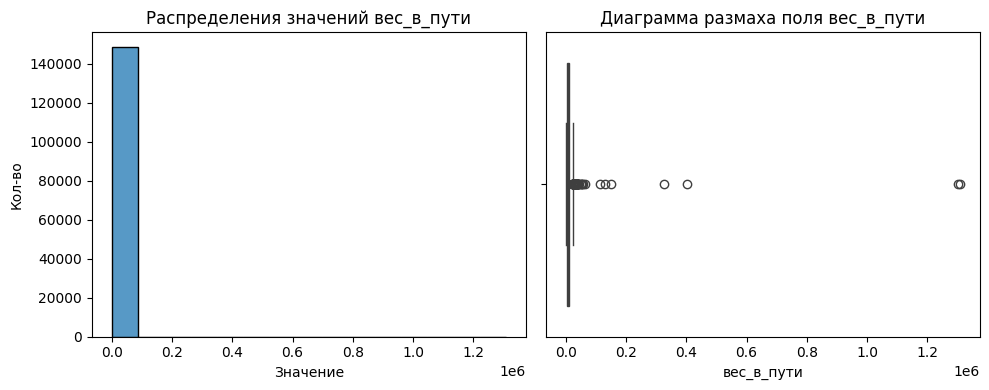



Описательные статистики поля расстояние_плеча


,расстояние_плеча
count,148689.00
mean,651.07
std,1156.35
min,0.60
25%,46.40
50%,267.70
75%,747.20
max,10645.00


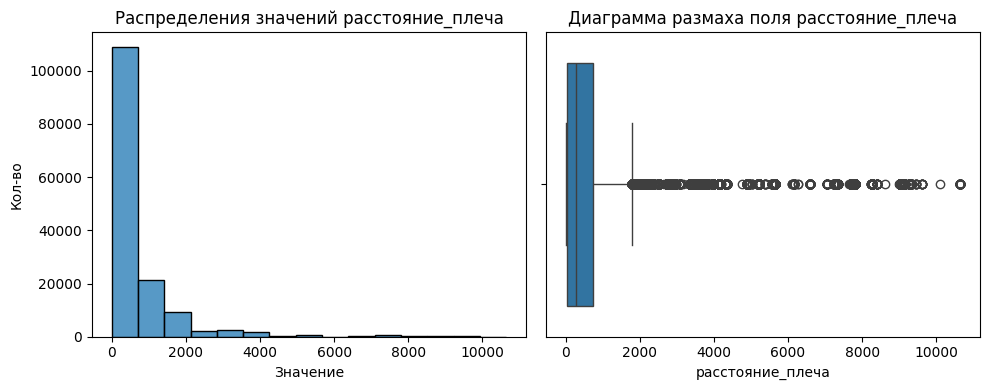



Описательные статистики поля расстояние_фрахта


,расстояние_фрахта
count,148689.00
mean,809.16
std,1318.85
min,0.60
25%,57.40
50%,369.50
75%,994.80
max,30284.00


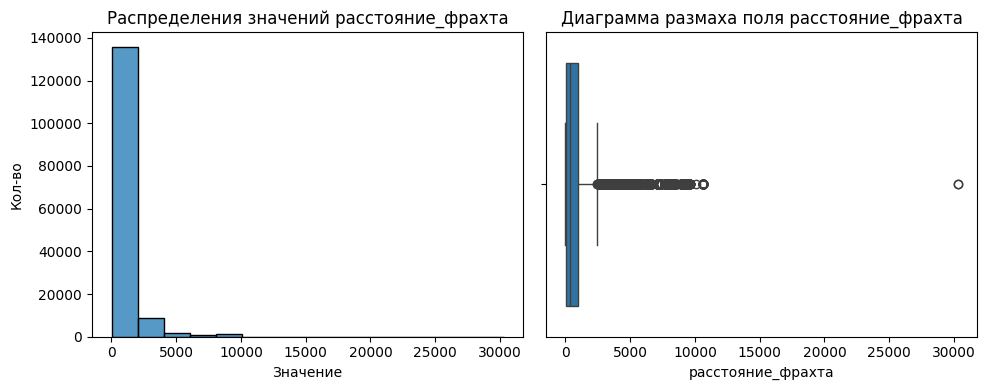

In [ ]:
# Создаем список полей с числовыми данными
trips_num_list = ['объем_кузова','объем_в_пути','вес_в_пути','расстояние_плеча','расстояние_фрахта']

for column in trips_num_list:
  print(f'Описательные статистики поля {column}')
  display(trips[column].describe().round(2))
  print()

  plt.figure(figsize=(10, 4))

  plt.subplot(1, 2, 1)
  sns.histplot(
    data=trips,
    x=trips[column],
    bins=15
  )
  plt.title(f"Распределения значений {column}")
  plt.xlabel('Значение')
  plt.ylabel('Кол-во')

  plt.subplot(1, 2, 2)
  sns.boxplot(
    data=trips,
    x=trips[column]
  )
  plt.title(f"Диаграмма размаха поля {column}")
  plt.tight_layout()
  plt.show()

  print()
  print()


Практически во всех числовых полях есть проблемы аномалии или выбросы :

* В поле *объем_кузова* минимальный объем равен **0**, что явная аномалия.

* В поле *объем_в_пути* максимальное значение **235.98**. Это явная ошибка, с учетом того что максимальное значение поля *объем_кузова* **137.59**.

* Максимальный вес в пути 1 308 995 кг. Похоже на выброс.

* Максимальное расстояние фрахта **30284**, существенно превышает максимальное расстояние плеча **10645**.

Рассмотрим каждое поле подробнее.

Найдем строки в которых объем транспортного средства равен 0 :

In [ ]:
# Считаем тс с нулевым объемом
zero_volume = trips[trips['объем_кузова']==0].shape[0]
# Считаем общее число строк
total_len = trips.shape[0]
# Считаем долю от всех данных в %
share = (zero_volume / total_len)*100

#
print(f"Число строк с нулевым объемом ТС: {zero_volume}")
print()
print(f"Что составляет {round(share, 2)}% от всех данных")



Число строк с нулевым объемом ТС: 17

Что составляет 0.01% от всех данных


Т.к. мы не можем восстановить данные по объему транспортных средств удалим эти строки.

In [ ]:
trips = trips[trips['объем_кузова']!=0]

# Считаем тс с нулевым объемом
zero_volume = trips[trips['объем_кузова']==0].shape[0]
# Считаем общее число строк
total_len = trips.shape[0]
# Считаем долю от всех данных в %
share = (zero_volume / total_len)*100

# Проверяем данные
print(f"Число строк с нулевым объемом ТС: {zero_volume}")
print()
print(f"Что составляет {round(share, 2)}% от всех данных")

Число строк с нулевым объемом ТС: 0

Что составляет 0.0% от всех данных


Для оценки аномалий найдем общее кол-во строк где объем груза после отправки превышает вместимость машины.

Так же оценим распределение превышений с помощью графиков.

Число строк где объем в пути больше объема тс: 4747
что составляет 3.19% от всех данных

Среднее превышение объема 10.13

Максимальное превышение объема 129.98

Медианное значение превышения объема 5.88




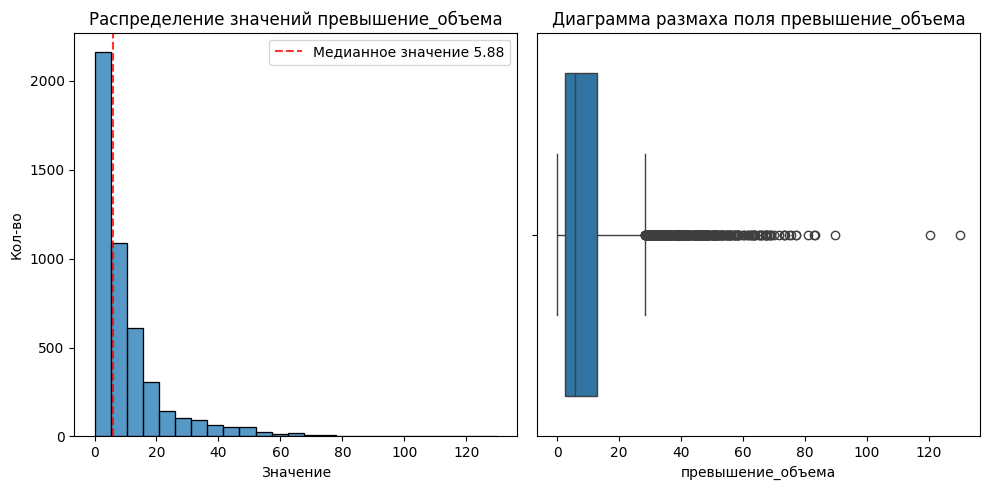

In [ ]:
# Создаем новый датасет для подсчета проблемных строк
wrong_volume = trips[(trips['объем_кузова'])<=(trips['объем_в_пути'])].copy()
#
wrong_volume['превышение_объема'] = wrong_volume['объем_в_пути'] - wrong_volume['объем_кузова']
# Считаем строки
wrong_volume_amt = wrong_volume.shape[0]
# Считаем долю
wrong_volume_share = (wrong_volume_amt / total_len) * 100
# Считаем среднее превышение объема
wrong_volume_mean = (wrong_volume['превышение_объема']).mean()
# Считаем максимальное превышение объема
wrong_volume_max = (wrong_volume['превышение_объема']).max()
wrong_volume_median = (wrong_volume['превышение_объема']).median()
# Выводим результы
print(f"Число строк где объем в пути больше объема тс: {wrong_volume_amt}")
print(f"что составляет {round(wrong_volume_share, 2)}% от всех данных")
print(f"\nСреднее превышение объема {wrong_volume_mean:.2f}")
print(f"\nМаксимальное превышение объема {wrong_volume_max:.2f}")
print(f"\nМедианное значение превышения объема {wrong_volume_median:.2f}")
print(f"\n")
# Строим графики для оценки
plt.figure(figsize=(10, 5))
column = 'превышение_объема'
# Гистограмма распределений
plt.subplot(1, 2, 1)
sns.histplot(
  data=wrong_volume,
  x=column,
  bins=25
)
# Оформление
plt.title(f"Распределение значений {column}")
plt.xlabel('Значение')
plt.ylabel('Кол-во')
plt.axvline(x=wrong_volume_median,linestyle='--',color='r',label=f"Медианное значение {wrong_volume_median:.02f}",alpha=0.8)
plt.legend()
# Диаграмма размаха
plt.subplot(1, 2, 2)
sns.boxplot(
  data=wrong_volume,
  x=column
)
# Оформление
plt.title(f"Диаграмма размаха поля {column}")
plt.tight_layout()
plt.show()



Всего аномальных строк больее **3%** от всех данных. Загрузить в машину груза больше чем позволяет объем машины невозможно. Скорее всего в этих рейсах были допущены ошибки либо при измерении грузов, либо при измерении объема ТС.

По графикам видно что для половины рейсов ошибка не превышает 6 м³, т.е. можно считать ошибки в измерениях для этих строк минимальными и скорректировать для них объем без потери данных. Поступим следующим образом :

* Для рейсов где ошибка составляет **менее 10% включительно** от объема ТС заменим заменим значение *объем_в_пути* на 90% от *объем_кузова*. Скорее всего там были допущены незначительные ошибки в измеренииях и мы будем считать что эти рейсы уехали почти полные.

* Строки где ошибка составляет **больше 10%** мы удалим т.к. при таком показателе допущены существенные ошибки при измерении грузов или объема кузова.

In [ ]:
# Создаем функцию для обработки аномалий
def clean_volume_anomalies(df):
    """
    Обработка аномалий объема груза после отправки :
    - При расхождении до 10% от объема кузова ТС : устанавливаем объем в пути = 90% от объема кузова ТС
    - При расхождении выше 10% от объема кузова ТС : удаляем строки
    """
    df_clean = df.copy()

    # Вычисляем разницу между объемом в пути и объемом ТС
    df_clean['превышение_объема'] = df_clean['объем_в_пути'] - df_clean['объем_кузова']
    df_clean['превышение_процент'] = (df_clean['превышение_объема'] / df_clean['объем_кузова']) * 100

    # Создаем маски для разных случаев
    small_excess_mask = (df_clean['превышение_процент'] > 0) & (df_clean['превышение_процент'] <= 10)
    large_excess_mask = df_clean['превышение_процент'] > 10

    # Случай 1: Небольшие превышения (до 10%) - устанавливаем 90% от объема ТС
    df_clean.loc[small_excess_mask, 'объем_в_пути'] = df_clean.loc[small_excess_mask, 'объем_кузова'] * 0.9

    # Случай 2: Значительные превышения (>10%) - помечаем для удаления
    rows_to_remove = large_excess_mask.sum()

    # Удаляем строки с большими превышениями
    df_clean = df_clean[~large_excess_mask]

    # Удаляем строки где объем в пути больше чем объем ТС
    excess_mask = df_clean['объем_в_пути'] >= df_clean['объем_кузова']
    df_clean = df_clean[~excess_mask]

    # Статистика
    print("РЕЗУЛЬТАТЫ ОБРАБОТКИ:")
    print(f"\n- Небольшие превышения (до 10% включительно): исправлено {small_excess_mask.sum()} строк")
    print(f"\n- Значительные превышения (более 10%): удалено {rows_to_remove} строк")

    # Удаляем временные столбцы
    # df_clean = df_clean.drop(['превышение_объема', 'превышение_процент','объем_в_пути'], axis=1)
    df_clean = df_clean.drop(['превышение_объема', 'превышение_процент'], axis=1)


    return df_clean


In [ ]:
# Применяем функцию
trips_clean = clean_volume_anomalies(trips)

# Проверяем обработку
wrong_volume = trips_clean[(trips_clean['объем_кузова'])<=(trips_clean['объем_в_пути'])].copy()
# Рассчитываем превышение объема
wrong_volume['превышение_объема'] = (wrong_volume['объем_в_пути'] - wrong_volume['объем_кузова'])
# Считаем строки
wrong_volume_amt = wrong_volume.shape[0]
# Считаем долю
wrong_volume_share = (wrong_volume_amt / total_len) * 100
# Считаем среднее превышение объема
wrong_volume_mean = (wrong_volume['превышение_объема']).mean()
# Считаем максимальное превышение объема
wrong_volume_max = (wrong_volume['превышение_объема']).max()

# Проверяем результы
print(f"\nПРОВЕРКА РЕЗУЛЬАТОВ")
print(f"\nЧисло строк где объем в пути больше объема тс: {wrong_volume_amt}")
print(f"что составляет {round(wrong_volume_share, 2)}% от всех данных")
print(f"\nСреднее превышение объема {wrong_volume_mean:.2f}")
print(f"\nМаксимальное превышение объема {wrong_volume_max:.2f}")


РЕЗУЛЬТАТЫ ОБРАБОТКИ:

- Небольшие превышения (до 10% включительно): исправлено 2470 строк

- Значительные превышения (более 10%): удалено 2273 строк

ПРОВЕРКА РЕЗУЛЬАТОВ

Число строк где объем в пути больше объема тс: 0
что составляет 0.0% от всех данных

Среднее превышение объема nan

Максимальное превышение объема nan


Таким образом нам удалось спасти больше половины проблемных данных.

Теперь рассмотрим поле *вес_в_пути*.

Для обработки выбросов в первую очередь отфильтруем данные по 99 перцентилю и посмотрим на их распределение.

99 перцентиль поля вес_в_пути: 19588.581000000002

Число строк выше границы: 1464



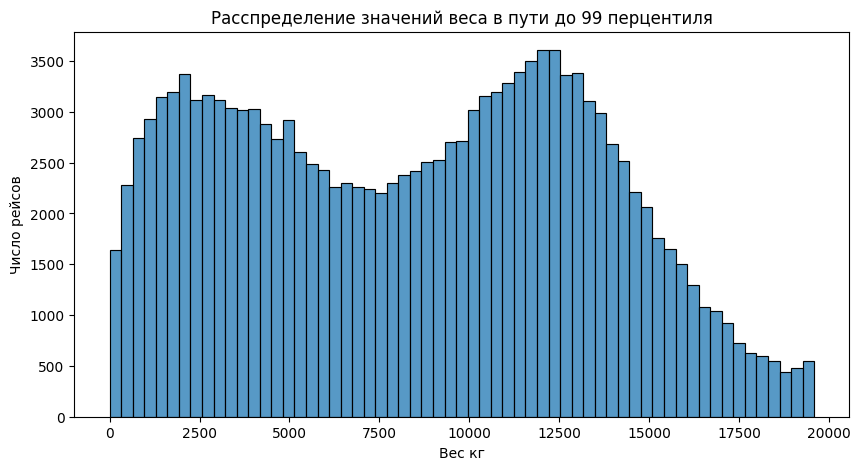

In [ ]:
# Вычисляем верхнюю границу по 99 перцентилю
weight_border = trips_clean['вес_в_пути'].quantile(0.99)
# Фильтруем дынные выше границы
wrong_weight_data = trips_clean[trips_clean['вес_в_пути']>=weight_border]
# Считаем число строк выше границы
wrong_weight_amt = wrong_weight_data.shape[0]
# Фильтруем дынные ниже границы
weight_data = trips_clean[trips_clean['вес_в_пути']<=weight_border]

plt.figure(figsize=(10,5))

sns.histplot(
    data=weight_data,
    x='вес_в_пути'
)
plt.title('Расспределение значений веса в пути до 99 перцентиля')
plt.xlabel('Вес кг')
plt.ylabel('Число рейсов')
print(f"99 перцентиль поля вес_в_пути: {weight_border}")
print()
print(f"Число строк выше границы: {wrong_weight_amt}")
print()
plt.show()



Максимальный вес перевозок автомобильным транспортом обычно составляет 20 000 кг. В наших данных рейсы в которых вес в пути существенно превышает эти значения скорее всего связан с ошибками.

При этом, небольшой перегруз иногда встречается. Вычислим верхнюю границу для полной фильтрации.

In [ ]:
# Создаем список кперцентилей для оценки 1% данных выше границы
quntile_range = [0.25, 0.5, 0.75, 0.90,0.99]

# Выводим значения
for i in quntile_range:
  print(f"{i} перцентиль составляет : {wrong_weight_data['вес_в_пути'].quantile(i)}")
  print()

0.25 перцентиль составляет : 19872.3375

0.5 перцентиль составляет : 20244.985

0.75 перцентиль составляет : 21066.122499999998

0.9 перцентиль составляет : 22473.643

0.99 перцентиль составляет : 39632.0439



Возьмем значение 90 перцентиля как верхнюю границу для фильтрации. Это значение перегруза все еще удовлетворяет здравому смыслу т.к. перегруз на 10% может встречаться в перевозках.

Отфильтруем данные по этой границе.

In [ ]:
# Создаем норвую верхнюю границу для веса
weight_border = wrong_weight_data['вес_в_пути'].quantile(0.90)
# Создаем логическую маску
weight_mask = trips_clean['вес_в_пути'] < weight_border

# Фильтруем данные с помощью маски
trips_clean = trips_clean[weight_mask]

# Фильтруем дынные выше границы
wrong_weight_data = trips_clean[trips_clean['вес_в_пути']>=weight_border]
# Считаем число строк выше границы
wrong_weight_amt = wrong_weight_data.shape[0]
print(f"Число строк выше границы: {wrong_weight_amt}")

Число строк выше границы: 0


Рассмотрим последнее числовое поле датасета с рейсам - *расстояние_фрахта*.

In [ ]:
trips_clean.sort_values(['расстояние_фрахта'], ascending=False).head(5)

,со,сп,по,пп,код_рейса,маршрут,плечо,отправление,прибытие,прибытие_план,окончание_разгрузки,объем_кузова,объем_в_пути,вес_в_пути,расстояние_фрахта,расстояние_плеча,перевозчик
15617,БН,ВК02,БН,ВК02,2201ОТБНВК02ОБ,ОТБНВК02ОБ,БНВК02,2023-02-02 13:04:31,2023-02-04 09:53:21,2023-02-04 12:04:31,2023-02-05 17:28:31,75.00,61.85,15131.23,30284.0,1486.4,Дельта Маркет
9224,ОТ,БН,ОТ,БН,2201ОТБНВК02ОБ,ОТБНВК02ОБ,ОТБН,2023-01-23 07:02:25,2023-02-02 10:15:51,2023-02-02 00:00:00,2023-02-02 12:49:04,75.00,65.08,15455.23,30284.0,6605.3,Дельта Маркет
29621,МС,ПС,МС,ПС,2502МСПС,МСПС,МСПС,2023-02-26 20:50:33,2023-04-11 17:23:46,2023-04-10 09:00:00,2023-04-11 18:21:42,76.27,70.26,13197.62,10645.0,10645.0,Корпорация Пром
14649,МС,ПС,МС,ПС,3001МСПС,МСПС,МСПС,2023-02-01 03:38:00,2023-03-18 12:12:15,2023-03-13 09:00:00,2023-03-18 17:26:15,76.27,47.86,10634.28,10645.0,10645.0,Корпорация Пром
91168,МС,ПСФР01,МС,ПСФР01,0506МСПСФР01-1,МСПСФР01,МСПСФР01,2023-06-06 15:13:04,2023-08-14 13:29:47,2023-08-02 20:00:00,2023-08-14 22:05:54,76.05,50.04,9341.96,10645.0,10645.0,Корпорация Пром


Видим один очень длинный рейс по которому не подтянулось одно плечо. Возможно, рейс был расформирован на последнем плече, но общее расстояние сохранилось.

В любом случае удалим эти строки.

In [ ]:
trips_clean = trips_clean[trips_clean['расстояние_фрахта']<=trips_clean['расстояние_плеча'].max()]

# Находим строки с расстоянием фрахта юольше максимального расстояния плеча
wrong_distance = trips_clean[trips_clean['расстояние_фрахта']>trips_clean['расстояние_плеча'].max()]
# Выводим данные
print(f"Число проблемных строк {wrong_distance.shape[0]}")

Число проблемных строк 0


После очистки данных можно снова построить гистограммы распределения и диаграммы размаха числовых данных датасета *trips*.

Описательные статистики поля объем_кузова


,объем_кузова
count,146246.00
mean,74.26
std,21.76
min,6.09
25%,55.63
50%,84.34
75%,85.71
max,137.59


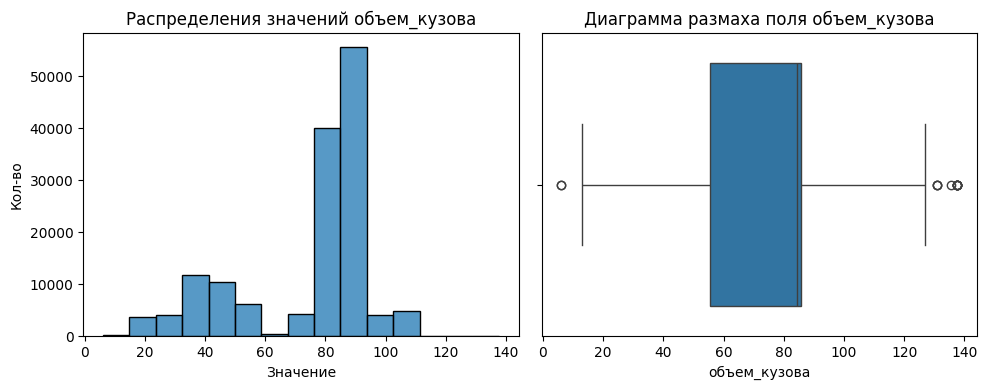



Описательные статистики поля объем_в_пути


,объем_в_пути
count,146246.00
mean,43.91
std,25.43
min,0.01
25%,20.26
50%,46.09
75%,66.85
max,109.14


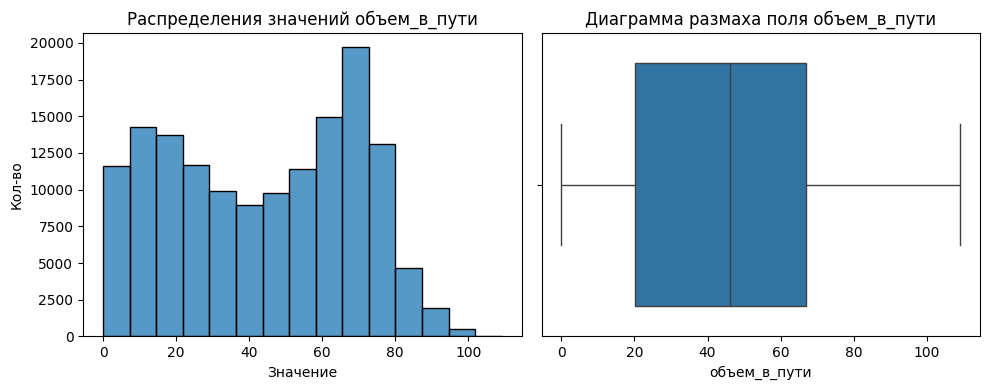



Описательные статистики поля вес_в_пути


,вес_в_пути
count,146246.00
mean,8576.40
std,5043.69
min,0.01
25%,4050.44
50%,8790.65
75%,12551.90
max,22468.68


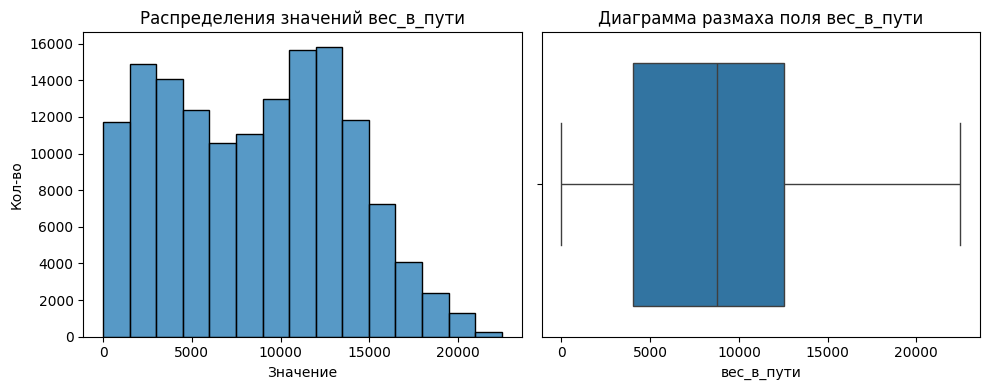



Описательные статистики поля расстояние_плеча


,расстояние_плеча
count,146246.00
mean,645.30
std,1150.97
min,0.60
25%,44.50
50%,263.70
75%,747.20
max,10645.00


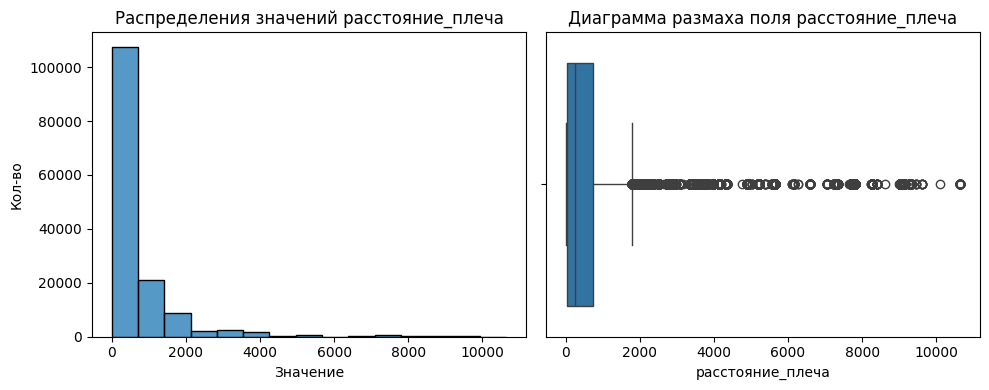



Описательные статистики поля расстояние_фрахта


,расстояние_фрахта
count,146246.00
mean,792.71
std,1293.14
min,0.60
25%,56.90
50%,361.80
75%,985.30
max,10645.00


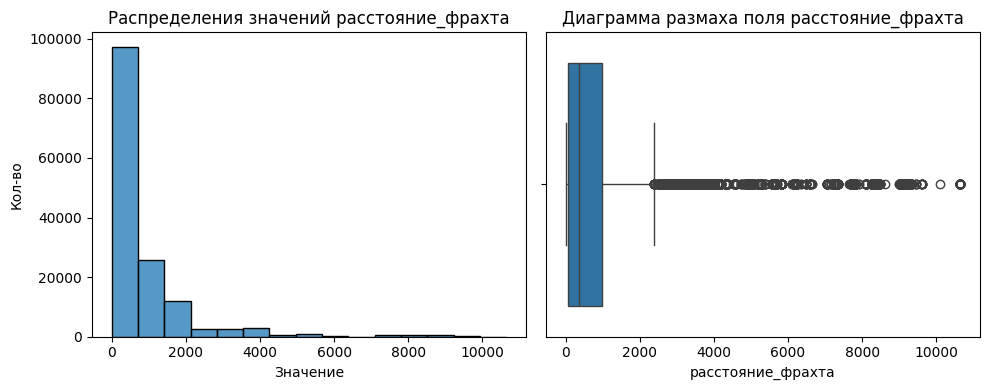

In [ ]:
# С помощью цикла выводим метод describe для числовых полей и строим графики
for column in trips_num_list:
  print(f'Описательные статистики поля {column}')
  display(trips_clean[column].describe().round(2))
  print()

  plt.figure(figsize=(10, 4))
  # Строим первый график
  plt.subplot(1, 2, 1)
  # Строим гистограмму распределения значений
  sns.histplot(
    data=trips_clean,
    x=trips_clean[column],
    bins=15
  )
  # Оформление
  plt.title(f"Распределения значений {column}")
  plt.xlabel('Значение')
  plt.ylabel('Кол-во')
  # Строим второй график
  plt.subplot(1, 2, 2)
  # Строим диаграмму размаха
  sns.boxplot(
    data=trips_clean,
    x=trips_clean[column]
  )
  # Оформление
  plt.title(f"Диаграмма размаха поля {column}")
  plt.tight_layout()
  plt.show()

  print()
  print()

Оценим числовые поля датасета *costs* :

In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191939 entries, 0 to 191938
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   дата_рейса         191939 non-null  datetime64[ns]
 1   код_рейса          191939 non-null  object        
 2   маршрут            191939 non-null  object        
 3   фрахт_фактический  191939 non-null  int64         
 4   тендер             191939 non-null  object        
 5   перевозчик         191939 non-null  object        
 6   менеджер           191939 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 10.3+ MB


,фрахт_фактический
count,191939.00
mean,757.56
std,1201.36
min,20.00
25%,130.00
50%,280.00
75%,810.00
max,12880.00


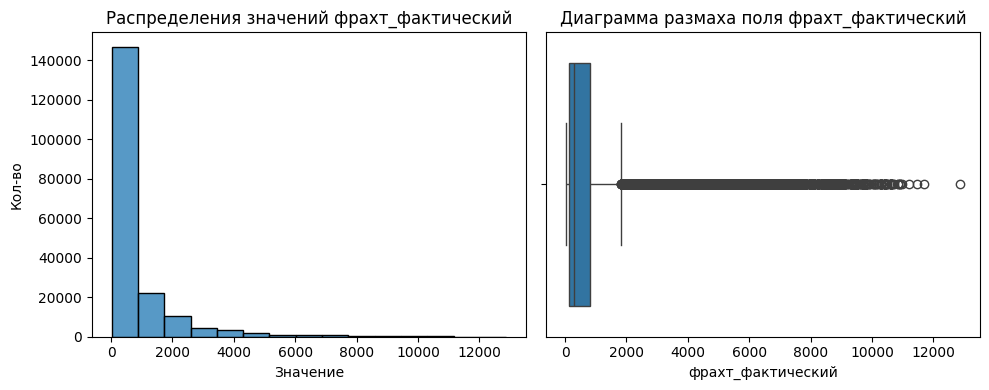

In [ ]:
# задаем целевое поле
num_column = 'фрахт_фактический'

# Выводим метод describe для целевого поля
display(costs[num_column].describe().round(2))

plt.figure(figsize=(10, 4))
  # Строим первый график
plt.subplot(1, 2, 1)
  # Строим гистограмму распределения значений
sns.histplot(
  data=costs,
  x=costs[num_column],
  bins=15
)
# Оформление
plt.title(f"Распределения значений {num_column}")
plt.xlabel('Значение')
plt.ylabel('Кол-во')
# Строим второй график
plt.subplot(1, 2, 2)
# Строим диаграмму размаха
sns.boxplot(
  data=costs,
  x=costs[num_column]
)
  # Оформление
plt.title(f"Диаграмма размаха поля {num_column}")
plt.tight_layout()
plt.show()

Нулевых значений стоимости нет, максимальное значение *17920*. Рассмотрим его подробнее.

In [ ]:
cost_border = costs['фрахт_фактический'].quantile(0.99999)

costs[costs['фрахт_фактический'] > cost_border]
#cost_border

,дата_рейса,код_рейса,маршрут,фрахт_фактический,тендер,перевозчик,менеджер
191937,2023-12-12,2201ОТБНВК02ОБ,ТВХБ,11690,0,Бета Пром Групп,Менеджер 22
191938,2023-01-22,3108МСВК02,ОТБНВК02ОБ,12880,0,Дельта Маркет,Менеджер 15


Теперь объединим датафреймы.

К датафрейму *trips* присоединим следующие данные из costs :

- Поле со стоимостью *фрахт_фактический*

- Поле *менеджер*

- Поле *тендер*

Соединять будем по полю *код_рейса* с помощью `inner` т.к. для дальнейших рассчетов понадобятся полные данные о рейсах.

In [ ]:
# оставляем только необходимые поля в датафрейме costs
costs_filtered = costs[['код_рейса','фрахт_фактический','менеджер','тендер']]

# Соединяем таблицы
df = pd.merge(
    left = trips_clean,
    right = costs_filtered,
    how='inner',
    on='код_рейса'
)
#
display(cool_info(df))


РАСПРЕДЕЛЕНИЕ ТИПОВ ДАННЫХ:
object            10
float64            5
datetime64[ns]     4
int64              1

    


,Поле,Число не пустых значений,Тип данных,Доля пропусков
0,со,140095,object,0.0
1,сп,140095,object,0.0
2,по,140095,object,0.0
3,пп,140095,object,0.0
4,код_рейса,140095,object,0.0
5,маршрут,140095,object,0.0
6,плечо,140095,object,0.0
7,отправление,140095,datetime64[ns],0.0
8,прибытие,140095,datetime64[ns],0.0
9,прибытие_план,140095,datetime64[ns],0.0


В результате мы получили очищенный от ошибок и предобработаный датасет готовый к дальнешему анализу.